In [5]:
import pandas as pd

In [6]:
trainPath = "./input/train.csv"
trainData = pd.read_csv(trainPath)
trainData.shape

(1460, 81)

In [7]:
#print(trainData.isnull().sum())

In [8]:
#trainData = trainData.dropna(axis=1)

In [9]:
trainData = pd.get_dummies(trainData)
trainData.shape

(1460, 290)

In [10]:
#trainData.head()

In [11]:
allParams = list(trainData.columns.values)

#Removing Categorical data
numParams = []

for i in allParams:
    if trainData[i].dtype == 'object':
        pass
    else:
        numParams.append(i)
        #print(i)

In [12]:
y = trainData.SalePrice

In [13]:
numParams.remove('SalePrice')
numParams.remove('Id')

In [14]:
X = trainData[numParams]

In [15]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#X = my_imputer.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42)

In [17]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(1314, 288)
(1314,)
(146, 288)
(146,)


In [20]:
from sklearn.preprocessing import Imputer
my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [21]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

In [22]:
#removing NaNs by replacing them by 0; not efficient but does good for starting of with the training
#train_X = train_X.fillna(0)

In [23]:
model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
#test_X = test_X.fillna(0)

In [25]:
predictions = model.predict(test_X)

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test_y, predictions)

18302.316438356167

In [27]:
16789.477397260274 
17090.829908675798 #drop columns and categorical data inclusion
18997.650570776255 #fill nan with 0
17998.12579908676 #with imputer
17237.995205479452 #drop columns with nans

17237.995205479452

In [32]:
#basic xgboost regression code
from xgboost import XGBRegressor

xgbr_model = XGBRegressor()

xgbr_model.fit(train_X, train_y, verbose=False)
newpred = xgbr_model.predict(test_X)

mean_absolute_error(test_y, newpred)

16094.251203981165

In [73]:
#advanced code for xgboost
my_model = XGBRegressor(n_estimators = 1000, learning_rate=0.03)
my_model.fit(train_X, train_y, early_stopping_rounds=4, 
             eval_set=[(test_X, test_y)], verbose=True)

[0]	validation_0-rmse:200925
Will train until validation_0-rmse hasn't improved in 4 rounds.
[1]	validation_0-rmse:195681
[2]	validation_0-rmse:190586
[3]	validation_0-rmse:185604
[4]	validation_0-rmse:180829
[5]	validation_0-rmse:176064
[6]	validation_0-rmse:171449
[7]	validation_0-rmse:167231
[8]	validation_0-rmse:162874
[9]	validation_0-rmse:158717
[10]	validation_0-rmse:154644
[11]	validation_0-rmse:150729
[12]	validation_0-rmse:146873
[13]	validation_0-rmse:143156
[14]	validation_0-rmse:139545
[15]	validation_0-rmse:136062
[16]	validation_0-rmse:132676
[17]	validation_0-rmse:129344
[18]	validation_0-rmse:126446
[19]	validation_0-rmse:123402
[20]	validation_0-rmse:120668
[21]	validation_0-rmse:117735
[22]	validation_0-rmse:114968
[23]	validation_0-rmse:112306
[24]	validation_0-rmse:109597
[25]	validation_0-rmse:107025
[26]	validation_0-rmse:104630
[27]	validation_0-rmse:102300
[28]	validation_0-rmse:100138
[29]	validation_0-rmse:97880.7
[30]	validation_0-rmse:95940.1
[31]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.03, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [72]:
newpred = my_model.predict(test_X)

mean_absolute_error(test_y, newpred)

16301.990261130137

In [74]:
trainPath = "./input/train.csv"
trainData = pd.read_csv(trainPath)
trainData.shape

(1460, 81)

In [75]:
trainData.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


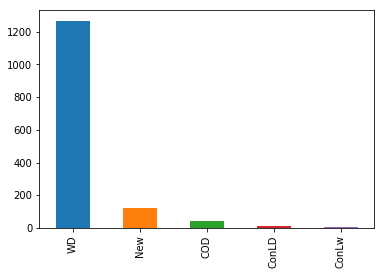

In [80]:
trainData['SaleType'].value_counts().head(5).plot.bar()

In [86]:
#testPath = "./input/test.csv"
#testData = pd.read_csv(testPath)
#test_y = testData.SalePrice

In [176]:
#submissionObj = pd.DataFrame({'Id': testData.Id, 'SalePrice': predictions})
#submissionObj.to_csv('submission.csv', index=False)